In [1]:
import numpy as np
import cv2
import h5py
import matplotlib.pyplot as plt

/home/hao/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
points_2d = np.array(x['shape']['representer']['points'])[:-1,:]

(2, 53149)

In [3]:
x = h5py.File('../basel/model2017-1_bfm_nomouth.h5', 'r')


In [6]:
[n for n in x['shape'].keys()]

['model', 'modelinfo', 'representer', 'version']

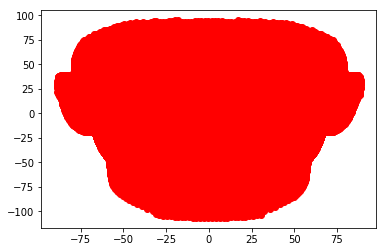

In [4]:
plt.plot(points_2d[0,:], points_2d[1,:], 'ro')
plt.show()

In [6]:
np.array(x['shape']['representer']['cells']) == np.array(x['color']['representer']['cells'])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [7]:
[n for n in x['shape']['model']]

['mean', 'noiseVariance', 'pcaBasis', 'pcaVariance']

In [15]:
print('mean --> ' + str(x['shape']['model']['mean'].shape))
print('pcm --> ' + str(x['shape']['model']['pcaBasis'].shape))

mean --> (159447,)
pcm --> (159447, 199)


In [17]:
x['shape']['model']['noiseVariance']

0.0

In [35]:
u = x['shape']['model']['mean']
pca = x['shape']['model']['pcaBasis']
v = x['shape']['model']['pcaVariance']

In [36]:
u.shape, pca.shape, v.shape

((159447,), (159447, 199), (199,))

In [46]:
u = x['shape']['model']['mean']
points = np.array([[u[i], u[i+1], u[i+2]] for i in range(0,len(u),3)])

In [49]:
points.shape

(53149, 3)

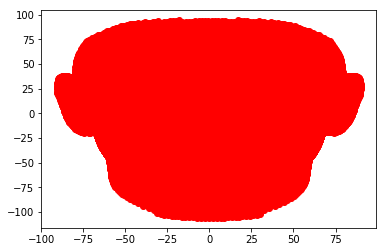

In [50]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.show()

In [186]:
np.array(x['shape']['model']['pcaVariance'])[0]
test = np.zeros((3,3), int)
np.fill_diagonal(test, np.array(x['shape']['model']['pcaVariance'])[0])
test

array([[787817,      0,      0],
       [     0, 787817,      0],
       [     0,      0, 787817]])

In [218]:
np.array(x['shape']['model']['pcaVariance']).shape

(199,)

In [52]:
from sklearn.decomposition import PCA

In [221]:
pca = PCA(n_components=3)
pca.components_ = np.array(x['shape']['model']['pcaBasis'])[:,0]
pca.explained_variance_ = np.array(x['shape']['model']['pcaVariance'])[0]
pca.mean_ = np.array(x['shape']['model']['mean'])
pca.noise_variance_ = noise_variance = np.array(x['shape']['model']['noiseVariance'])
pca.whiten = False

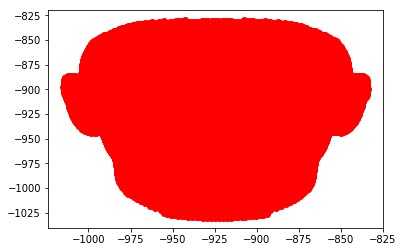

In [222]:
t = pca.inverse_transform(np.array(x['shape']['representer']['points']).flatten())
points_t = np.array([[t[i], t[i+1], t[i+2]] for i in range(0,len(t),3)])
plt.plot(points_t[:,0], points_t[:,1], 'ro')
plt.show()

In [121]:
np.array(x['shape']['model']['noiseVariance']).shape

(1,)

In [143]:
pca2 = PCA(n_components=3)
pca2.components_ = np.array(x['color']['model']['pcaBasis'])[:,100]
pca2.explained_variance_ = np.array(x['color']['model']['pcaVariance'])[100]
pca2.mean_ = np.array(x['color']['model']['mean'])
pca2.noise_variance_ = np.array(x['color']['model']['noiseVariance'])

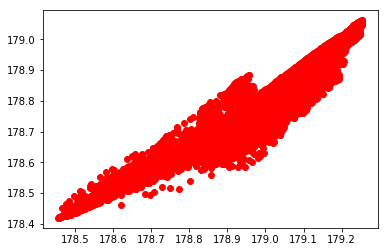

In [144]:
t2 = pca2.inverse_transform(np.array(x['color']['representer']['points']).reshape((3*53149,)))
points_t2 = np.array([[t2[i], t2[i+1], t2[i+2]] for i in range(0,len(t2),3)])
plt.plot(points_t2[:,0], points_t2[:,1], 'ro')
plt.show()

In [135]:
points_t2.shape

(53149, 3)

In [139]:
points_t2[2]

array([-6809.274 , -6809.4614, -6809.571 ], dtype=float32)

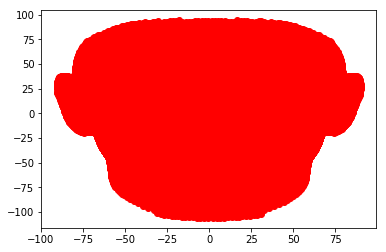

In [238]:
pcaBasis = np.array(x['shape']['model']['pcaBasis'])[:,10]
pcaVariance = np.array(x['shape']['model']['pcaVariance'])[10]
mean = np.array(x['shape']['model']['mean'])
noise_variance = np.array(x['shape']['model']['noiseVariance'])
points = np.array(x['shape']['representer']['points']).flatten()
pcaBasis.shape, points.shape
p = mean + (pcaBasis * points)
points_t = np.array([[p[i], p[i+1], p[i+2]] for i in range(0,len(p),3)])
plt.plot(points_t[:,0], points_t[:,1], 'ro')
plt.show()

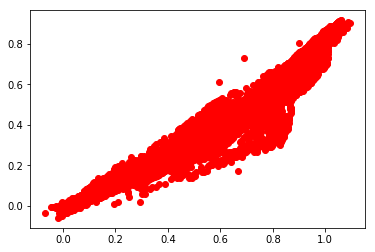

In [242]:
pcaBasis = np.array(x['color']['model']['pcaBasis'])[:,0]
pcaVariance = np.array(x['color']['model']['pcaVariance'])[0]
mean = np.array(x['color']['model']['mean'])
noise_variance = np.array(x['color']['model']['noiseVariance'])
points = np.array(x['color']['representer']['points']).flatten()
pcaBasis.shape, points.shape
p = mean + (pcaBasis * points)
points_t = np.array([[p[i], p[i+1], p[i+2]] for i in range(0,len(p),3)])
plt.plot(points_t[:,0], points_t[:,1], 'ro')
plt.show()

In [241]:
points_t[0]

array([0.6933893, 0.5303865, 0.4647347], dtype=float32)

array([0.8724892 , 0.6933912 , 0.58934176], dtype=float32)

In [ ]:
https://pypi.org/project/trimesh/